## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import statsmodels.api as sm
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

## Reading Dataset

In [3]:
HR_Data = pd.read_csv('/Users/pratik_4511/Desktop/Northeastern University /Quarter_4A:B/Analytics System/Project/HR Dataset (1).csv')
HR_Data.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## Required Data Cleansing

In [4]:
## Describe=ing dataset 
HR_Data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
# Shape of data
HR_Data.shape

(54808, 14)

In [6]:
# Info
HR_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
# checking fo null values
HR_Data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

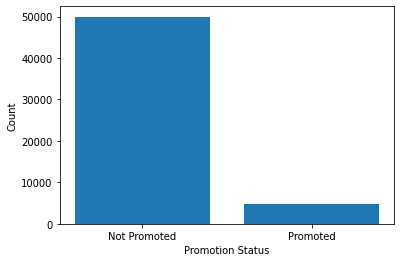

In [26]:
import matplotlib.pyplot as plt

# count the number of occurrences of each unique value in the 'is_promoted' column
counts = HR_Data['is_promoted'].value_counts()

# create a bar chart with the counts
plt.bar(counts.index, counts.values)

# set the labels for the x and y axes
plt.xlabel('Promotion Status')
plt.ylabel('Count')

# set the x-axis labels to custom labels
plt.xticks([0, 1], ['Not Promoted', 'Promoted'])

# display the chart
plt.show()

In [9]:
## replacing null values
HR_Data['education'] = HR_Data['education'].fillna(HR_Data['education'].mode()[0])
HR_Data['previous_year_rating'].fillna(HR_Data['previous_year_rating'].median(), inplace=True)

In [10]:
# dropping unnessarry data columns
HR_Data.drop(columns=['employee_id'],inplace=True)
HR_Data.head(5)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## Outliers and Duplicates

In [11]:
## Function -1 
def Outliers(df, column_names):
    for column_name in column_names:
        # calculate the mean and standard deviation of the column
        mean = df[column_name].mean()
        std_dev = df[column_name].std()

        # calculate the lower and upper limits using 3 sigma rule
        lower_limit = mean - 3 * std_dev
        upper_limit = mean + 3 * std_dev

        # identify outliers using z-score
        z_scores = np.abs((df[column_name] - mean) / std_dev)
        outliers = df[z_scores > 3]

        # replace outliers with median value
        median_value = df[column_name].median()
        df.loc[z_scores > 3, column_name] = median_value

        # print the number of outliers and the cleaned dataframe
        print('Number of outliers:', len(outliers))

In [12]:
data = ['length_of_service','age']
Outliers(HR_Data,data)

Number of outliers: 975
Number of outliers: 639


In [13]:
## checking for duplicates
duplicates = HR_Data.duplicated()
print('Number of duplicates:', duplicates.sum())

Number of duplicates: 171


In [14]:
# dropping the duplicates 
HR_Data = HR_Data.drop_duplicates()

In [15]:
HR_Data.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


## Machine Learning Model Data Preprations

In [16]:
#counting the categories of specific columns
print('------------------------------------1')
print(HR_Data['department'].value_counts())
print('------------------------------------2')
print(HR_Data['region'].value_counts())
print('------------------------------------3')
print(HR_Data['education'].value_counts())
print('------------------------------------4')
print(HR_Data['gender'].value_counts())
print('------------------------------------5')
print(HR_Data['recruitment_channel'].value_counts())


------------------------------------1
Sales & Marketing    16753
Operations           11316
Technology            7128
Procurement           7128
Analytics             5336
Finance               2534
HR                    2411
Legal                 1032
R&D                    999
Name: department, dtype: int64
------------------------------------2
region_2     12286
region_22     6386
region_7      4836
region_15     2797
region_13     2643
region_26     2253
region_31     1927
region_4      1703
region_27     1652
region_16     1465
region_28     1318
region_11     1314
region_23     1173
region_29      992
region_32      942
region_19      873
region_20      846
region_14      827
region_25      817
region_17      796
region_5       765
region_6       688
region_30      655
region_8       654
region_10      648
region_1       610
region_24      507
region_12      498
region_9       418
region_21      411
region_3       346
region_34      291
region_33      269
region_18       31
Name

In [17]:
HR_Data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [18]:
# Dummies for selected variabels
department = pd.get_dummies(HR_Data['department'],drop_first=True)
education = pd.get_dummies(HR_Data['education'],drop_first=True)
gender = pd.get_dummies(HR_Data['gender'],drop_first=True)
recruitment_channel = pd.get_dummies(HR_Data['recruitment_channel'],drop_first=True)

HR_Data = pd.concat([HR_Data,department,education,gender,recruitment_channel], axis=1)
HR_Data = HR_Data.drop(columns=['department','education','gender','recruitment_channel'])


In [19]:
HR_Data.head(10)

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Finance,...,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above,m,referred,sourcing
0,region_7,1,35,5.0,8,1,0,49,0,0,...,0,0,0,1,0,0,1,0,0,1
1,region_22,1,30,5.0,4,0,0,60,0,0,...,1,0,0,0,0,0,0,1,0,0
2,region_19,1,34,3.0,7,0,0,50,0,0,...,0,0,0,1,0,0,0,1,0,1
3,region_23,2,39,1.0,10,0,0,50,0,0,...,0,0,0,1,0,0,0,1,0,0
4,region_26,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,1,0,0,1,0,0
5,region_2,2,31,3.0,7,0,0,85,0,0,...,0,0,0,0,0,0,0,1,0,1
6,region_20,1,31,3.0,5,0,0,59,0,0,...,1,0,0,0,0,0,0,0,0,0
7,region_34,1,33,3.0,6,0,0,63,0,0,...,1,0,0,0,0,0,1,1,0,1
8,region_20,1,28,4.0,5,0,0,83,0,0,...,0,0,0,0,0,0,0,1,0,0
9,region_1,1,32,5.0,5,1,0,54,0,0,...,0,0,0,1,0,0,1,1,0,1


In [20]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the categorical variable
HR_Data['region'] = le.fit_transform(HR_Data['region'])

In [21]:
HR_Data.shape

(54637, 22)

## Splitting the data into train and test.

In [22]:
x = HR_Data.drop(['is_promoted'],axis=1)
y = HR_Data['is_promoted']

feature_names = x.columns.tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Logistics Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score
import time

model = LogisticRegression()
start_time = time.time() 

# Feature selection with RFE
rfe = RFE(model, n_features_to_select=10)        
X_train_rfe = rfe.fit_transform(x_train, y_train)
X_test_rfe = rfe.transform(x_test) 
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features'])

# Training the model
model.fit(X_train_rfe, y_train)

# Testing the model
y_pred = model.predict(X_test_rfe)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds")

print(f"{type(model).__name__}")
print("Selected Features from this model : \n", selected_features_df)
print(f"{type(model).__name__}: Selected features = {X_train_rfe.shape[1]}, Accuracy = {acc:.2f}, Precision = {prec}") 
print("Classification Report : \n", classification_report(y_test, y_pred))  

Execution time: 0.99 seconds
LogisticRegression
Selected Features from this model : 
       Selected Features
0  previous_year_rating
1         KPIs_met >80%
2    avg_training_score
3               Finance
4                    HR
5                 Legal
6            Operations
7           Procurement
8     Sales & Marketing
9            Technology
LogisticRegression: Selected features = 10, Accuracy = 0.93, Precision = 0.9268888323945325
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     14982
           1       0.86      0.24      0.38      1410

    accuracy                           0.93     16392
   macro avg       0.90      0.62      0.67     16392
weighted avg       0.93      0.93      0.91     16392



## XGBOOST

In [24]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import time

model = XGBClassifier()
start_time = time.time() 

# Feature selection with RFE
rfe = RFE(model, n_features_to_select=10)        
X_train_rfe = rfe.fit_transform(x_train, y_train)
X_test_rfe = rfe.transform(x_test) 
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features'])

# Training the model
model.fit(X_train_rfe, y_train)

# Testing the model
y_pred = model.predict(X_test_rfe)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds")

print(f"{type(model).__name__}")
print("Selected Features from this model : \n", selected_features_df)
print(f"{type(model).__name__}: Selected features = {X_train_rfe.shape[1]}, Accuracy = {acc:.2f}, Precision = {prec}") 
print("Classification Report : \n", classification_report(y_test, y_pred))  

Execution time: 38.80 seconds
XGBClassifier
Selected Features from this model : 
       Selected Features
0  previous_year_rating
1         KPIs_met >80%
2           awards_won?
3    avg_training_score
4               Finance
5                    HR
6            Operations
7           Procurement
8     Sales & Marketing
9            Technology
XGBClassifier: Selected features = 10, Accuracy = 0.94, Precision = 0.9409446207541854
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     14982
           1       0.93      0.34      0.50      1410

    accuracy                           0.94     16392
   macro avg       0.94      0.67      0.74     16392
weighted avg       0.94      0.94      0.93     16392



## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

start_time = time.time() 

# Feature selection with RFE
rfe = RFE(model, n_features_to_select=10)        
X_train_rfe = rfe.fit_transform(x_train, y_train)
X_test_rfe = rfe.transform(x_test) 
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features'])

# Training the model
model.fit(X_train_rfe, y_train)

# Testing the model
y_pred = model.predict(X_test_rfe)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds")

print(f"{type(model).__name__}")
print("Selected Features from this model : \n", selected_features_df)
print(f"{type(model).__name__}: Selected features = {X_train_rfe.shape[1]}, Accuracy = {acc:.2f}, Precision = {prec}") 
print("Classification Report : \n", classification_report(y_test, y_pred))  

Execution time: 38.84 seconds
RandomForestClassifier
Selected Features from this model : 
       Selected Features
0                region
1       no_of_trainings
2                   age
3  previous_year_rating
4     length_of_service
5         KPIs_met >80%
6           awards_won?
7    avg_training_score
8            Operations
9     Sales & Marketing
RandomForestClassifier: Selected features = 10, Accuracy = 0.93, Precision = 0.9176877889173564
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     14982
           1       0.71      0.29      0.42      1410

    accuracy                           0.93     16392
   macro avg       0.82      0.64      0.69     16392
weighted avg       0.92      0.93      0.92     16392

